In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [11]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [14]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Let's essentially drop columns that are not used in Regression. Values that are not continuous

In [16]:
data= df.drop(['area_type','availability','society', 'balcony'], axis='columns')
data.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


Data cleaning process. To remove or edit the columns with null values. For example bath has 73 missing values, I have the option to either drop them, or fill them out with Measures of spread, ie Mean, Median etc. But when you check the shape, we have 13k rows. Dropping 73 will do no harm. So I dropped them. 

In [17]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [19]:
data = data.dropna()
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

The size columns seems to have a variety of values. Let me display the unique values it has

In [20]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [24]:
data['bedrooms'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [25]:
data.head(10)

,location,size,total_sqft,bath,price,BHK,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,3
4,Kothanur,2 BHK,1200,2.0,51.00,2,2
5,Whitefield,2 BHK,1170,2.0,38.00,2,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6,6


In [27]:
data['bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

43 Bedrooms looked funny. I decided to check it out, to see whether the info matches. I prompted to return any data that has more than 20 bedrooms.

In [29]:
data[data['bedrooms'] > 20]

,location,size,total_sqft,bath,price,BHK,bedrooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43,43


I found the 27 bedroom have to have an area of 8000 square feet, while that with 43 having 2400. That to me seems odd. So readily, that is an outlier. It will really skew the results. I propose to drop it. Let me check the unique values in the total square feet column.

In [30]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

There are values that occur in ranges -> '1133 - 1384'. I want to check them out.

In [31]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [32]:
data[~data['total_sqft'].apply(is_float)]


,location,size,total_sqft,bath,price,BHK,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2,2


In [33]:
data[~data['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,BHK,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4,4


In [35]:
data[~data['total_sqft'].apply(is_float)]['total_sqft'].unique()


array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

In [36]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [37]:
data2 = data.copy()


In [38]:
data2['total_sqft'] = data2['total_sqft'].apply(convert_sqft_to_num)
data2.head(10)

,location,size,total_sqft,bath,price,BHK,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,6


In [39]:
data2.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
BHK                 1
bedrooms            1
Name: 410, dtype: object

In [40]:
data2.head()

,location,size,total_sqft,bath,price,BHK,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2


Feature Engineering. 
I want to introduce a column that shall be used as a metric, where we calculate the cost in terms of each square_ft. 
A calculated column 

In [41]:
data2['price_per_sqft'] = ( data2['price'] * 100000 ) / data2['total_sqft']
data2.head()

,location,size,total_sqft,bath,price,BHK,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2,4250.000000


In [43]:
data2.shape

(13246, 8)

In [45]:
len(data2['location'].unique())

1304

There are 1304 unique locations in this data. We can try reduce them . Let's first find how these locations are distributed in terms of count. And arrange the values in descending order .

In [47]:
data2.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

I want to group all the locations that have values less than 10 into one group. Let's say Other. Let's find out how many there are

In [48]:
location_count = data2.groupby('location')['location'].agg('count')
location_count 

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1304, dtype: int64

In [50]:
len(location_count[location_count <= 10])

1063

In [52]:
locations_less_than_10 = location_count[location_count <= 10]
locations_less_than_10

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1063, dtype: int64

I am going to change the location value in the dataframe, such that, if it has less than 10 houses, it is grouped as other.

In [61]:
data2['location'] = data2['location'].apply(lambda x: 'Other' if x in locations_less_than_10 else x)

In [62]:
len(data2['location'].unique())

242

In [63]:
data2.head(20)

,location,size,total_sqft,bath,price,BHK,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,6,36274.509804


In [67]:
data2[data2.total_sqft / data2.bedrooms < 300].head()

,location,size,total_sqft,bath,price,BHK,bedrooms,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,3,20000.000000


I decided to remove these values from the working data. They are outliers. 
Here's the logic: (This is domain knowledge.)

A house with 1000 square feet with 6 bedrooms sounds off.
The numbers dont add up. 

8 bedrooms -> 600 sqft

This is pasted from GPT:

The size of a house can vary widely based on factors such as architectural design, regional building norms, and personal preferences. Here's a rough estimate of house sizes based on the number of bedrooms:

Studio or One-Bedroom House:

Size: 400 to 800 square feet (smaller apartments or houses)
Two-Bedroom House:

Size: 800 to 1500 square feet (moderate-sized homes)
Three-Bedroom House:

Size: 1,200 to 2,500 square feet (common family-sized homes)
Four-Bedroom House:

Size: 1,800 to 3,000+ square feet (larger family homes)
Five or More Bedrooms:

Size: 2,500 to 5,000+ square feet (larger homes for larger families)

It's important to note that these are general estimates, and actual sizes can vary. Preferences for open floor plans, additional rooms (like home offices or recreational spaces), and other architectural features can all influence the overall size and layout of a house. Local building codes and regional housing norms also play a role in determining the size of homes in specific areas. When considering the size of a house, it's advisable to work with an architect or builder to customize the design based on your needs and the local context.

I then created another dataframe that I'll use for calculations and modelling. Data without these outliers. 

In [68]:
data2.shape

(13246, 8)

In [69]:
df2 = data2[~(data2.total_sqft / data2.bedrooms < 300)]
df2.shape

(12502, 8)

In [70]:
df2.head(10)

,location,size,total_sqft,bath,price,BHK,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3,3888.888889


I want to look out for the properties where the price per sq ft is either very high or very low. I can achieve this by understanding the stats of the cell

In [71]:
df2.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

A function to remove the outlier prices



In [72]:
df2.shape

(12502, 8)

In [74]:
def remove_outlier_prices(df):
    # Create an empty dataframe to store the data that will be filtered
    df_out = pd.DataFrame()
    
    #group the input dataframe 'df' by the 'location' column
    for key, subdf in df.groupby('location'):
        # calculate the mean and standard deviation of the 'price_per_sqft' column for each location
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        #Filter out rows where 'price_per_sqft' is outside the range of (mean - std deviation) to (mean + std deviation )
        reduced_df = subdf[(subdf.price_per_sqft > (m- st)) & (subdf.price_per_sqft <= (m + st)) ]
        
        # Concatenate the filtered dataframe to the output Dataframe
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
        
        # Return the dataframe with outliers removed
    return df_out

df2 = remove_outlier_prices(df2)
df2.shape


(6970, 8)

We have removed the outliers. From 12k rows down to 6.9k rows. I need to find another means of removing the outliers, cause this reduces the data significantly.
That's a lot of data loss 

In [77]:
import matplotlib.pyplot as plt

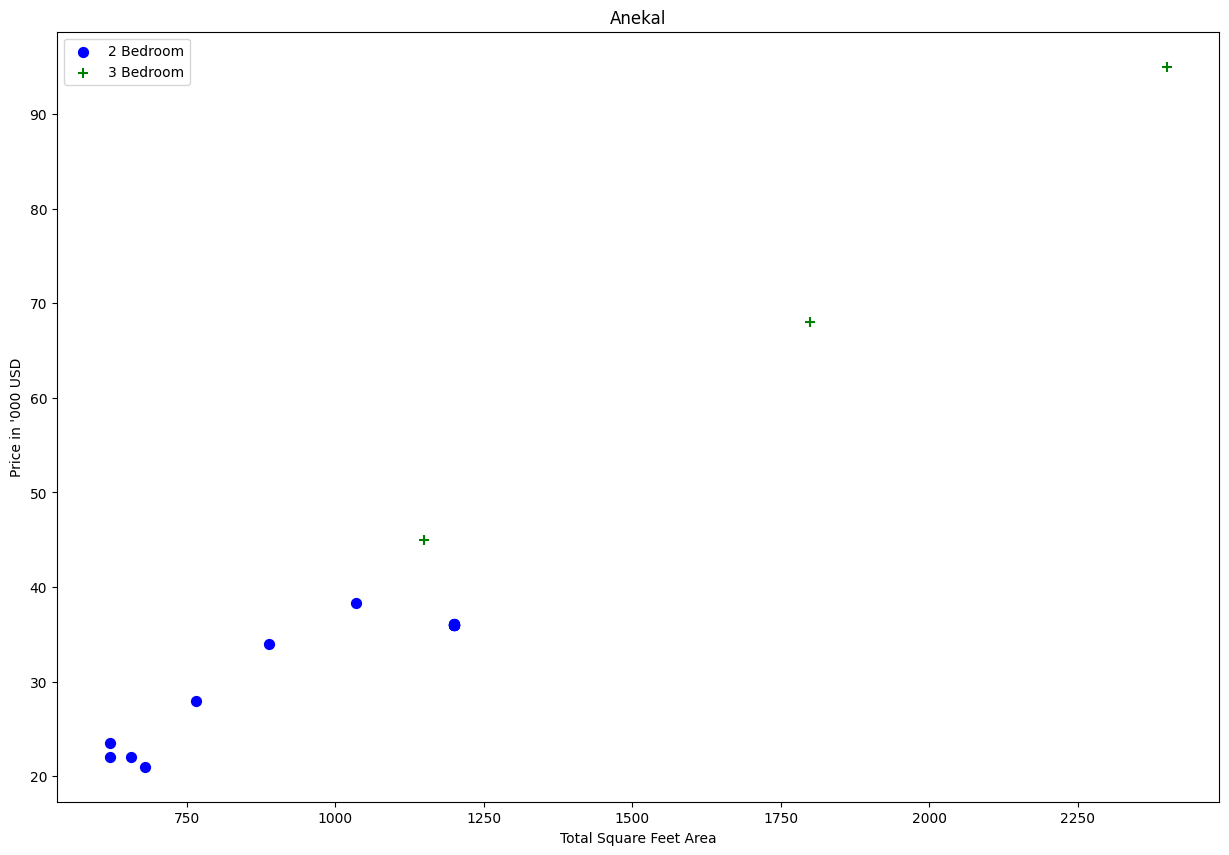

In [105]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bedrooms == 2)]
    bhk3 = df[(df.location == location) & (df.bedrooms == 3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 Bedroom', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 Bedroom', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price in \'000 USD')
    plt.title(location)
    plt.legend()
    
    
plot_scatter_chart(df2, 'Anekal')

In [87]:
df2.tail(10)

,location,size,total_sqft,bath,price,BHK,bedrooms,price_per_sqft
6960,other,3 BHK,1500.0,2.0,78.00,3,3,5200.000000
6961,other,2 BHK,745.0,2.0,36.00,2,2,4832.214765
6962,other,2 BHK,1155.0,2.0,64.00,2,2,5541.125541
6963,other,3 BHK,1508.0,3.0,77.00,3,3,5106.100796
6964,other,2 BHK,1200.0,2.0,70.00,2,2,5833.333333
6965,other,2 BHK,1095.0,2.0,57.00,2,2,5205.479452
6966,other,2 BHK,1256.0,2.0,65.00,2,2,5175.159236
6967,other,2 BHK,1353.0,2.0,110.00,2,2,8130.081301
6968,other,3 BHK,1440.0,2.0,63.93,3,3,4439.583333
6969,other,2 BHK,1075.0,2.0,48.00,2,2,4465.116279


In [89]:
df2['location'].unique()

array([' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar',
       'Balagere', 'Banashankari', 'Banashankari Stage II',
       'Banashankari Stage III', 'Banashankari Stage V',
       'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout',
       'Bannerghatta', 'Bannerghatta Road', 'Basavangudi',
       'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road',
       'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli',
       'Billekahalli', 'Binny Pete', 'Bisuva

In [100]:
def remove_outlier_bhk(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            for bhk, bhk_df in location_df.groupby('bhk'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count'] > 5:
                    exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft > (stats['mean'])].index.values)
                
        return df.drop(exclude_indices, axis='index')
    
    new_data =  remove_outlier_bhk(df2)
    new_data.shape

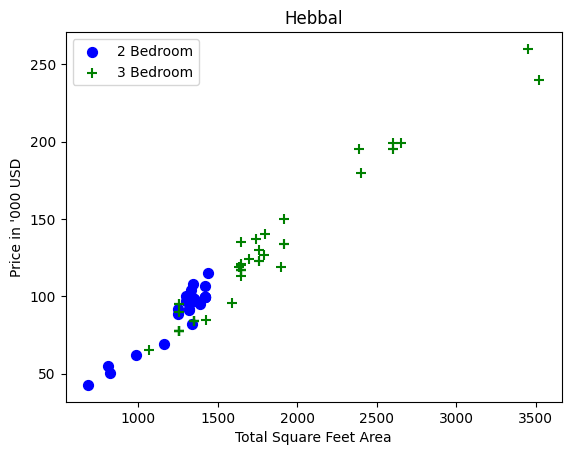

In [102]:
plot_scatter_chart(df2,'Hebbal')

Text(0, 0.5, 'Count')

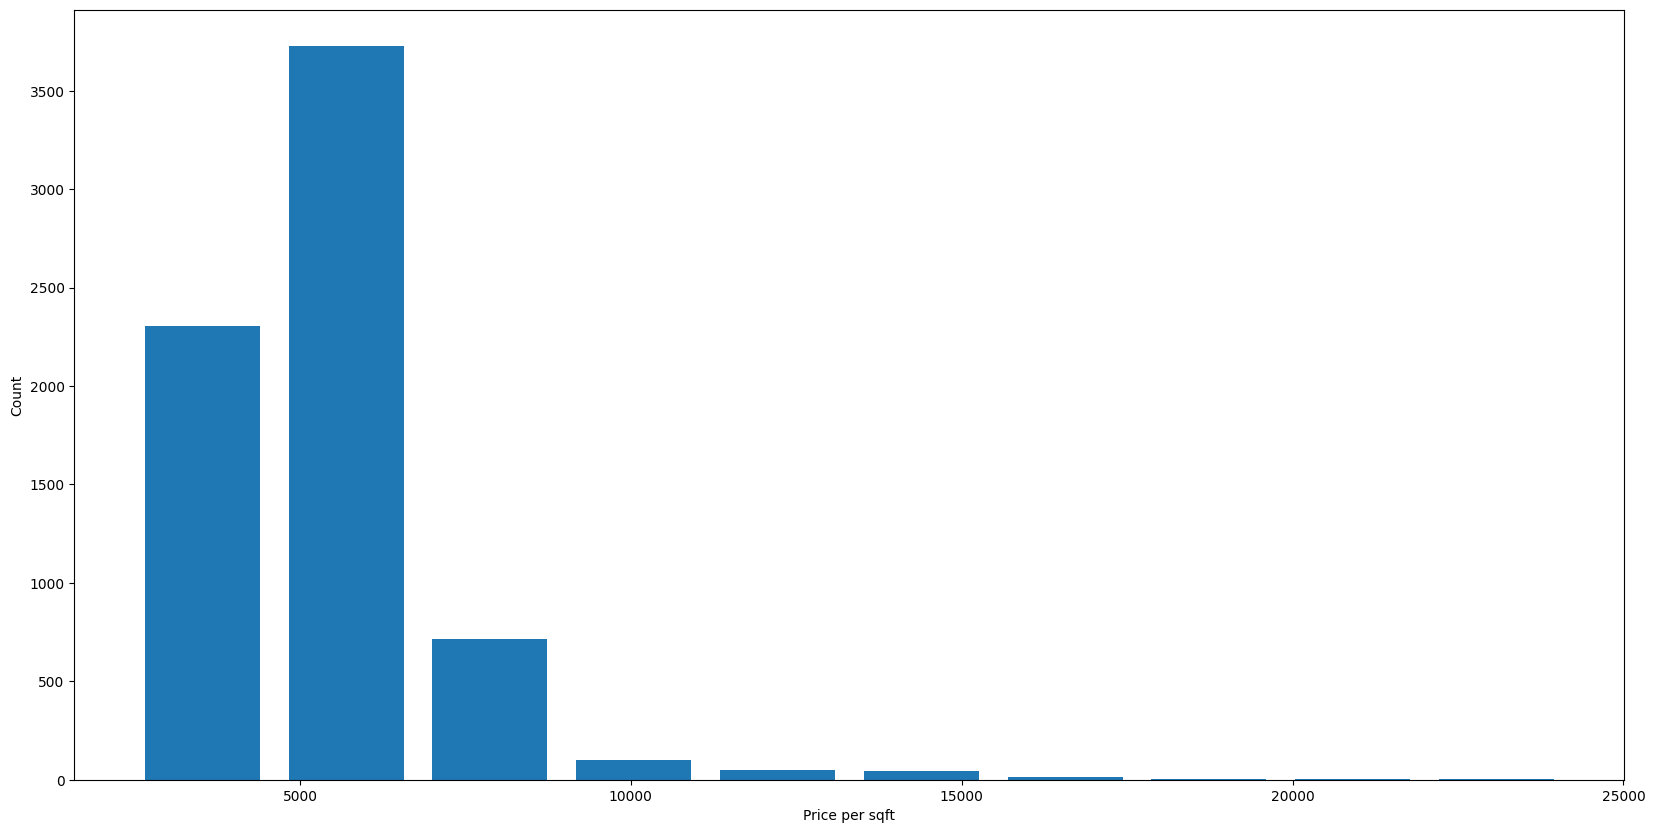

In [104]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df2.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

In [107]:
df2.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [108]:
df2[df2.bath>10]

,location,size,total_sqft,bath,price,BHK,bedrooms,price_per_sqft
3472,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,10,4000.000000
5640,other,10 BHK,12000.0,12.0,525.0,10,10,4375.000000
5696,other,16 BHK,10000.0,16.0,550.0,16,16,5500.000000
6509,other,13 BHK,5425.0,13.0,275.0,13,13,5069.124424


Text(0, 0.5, 'Count')

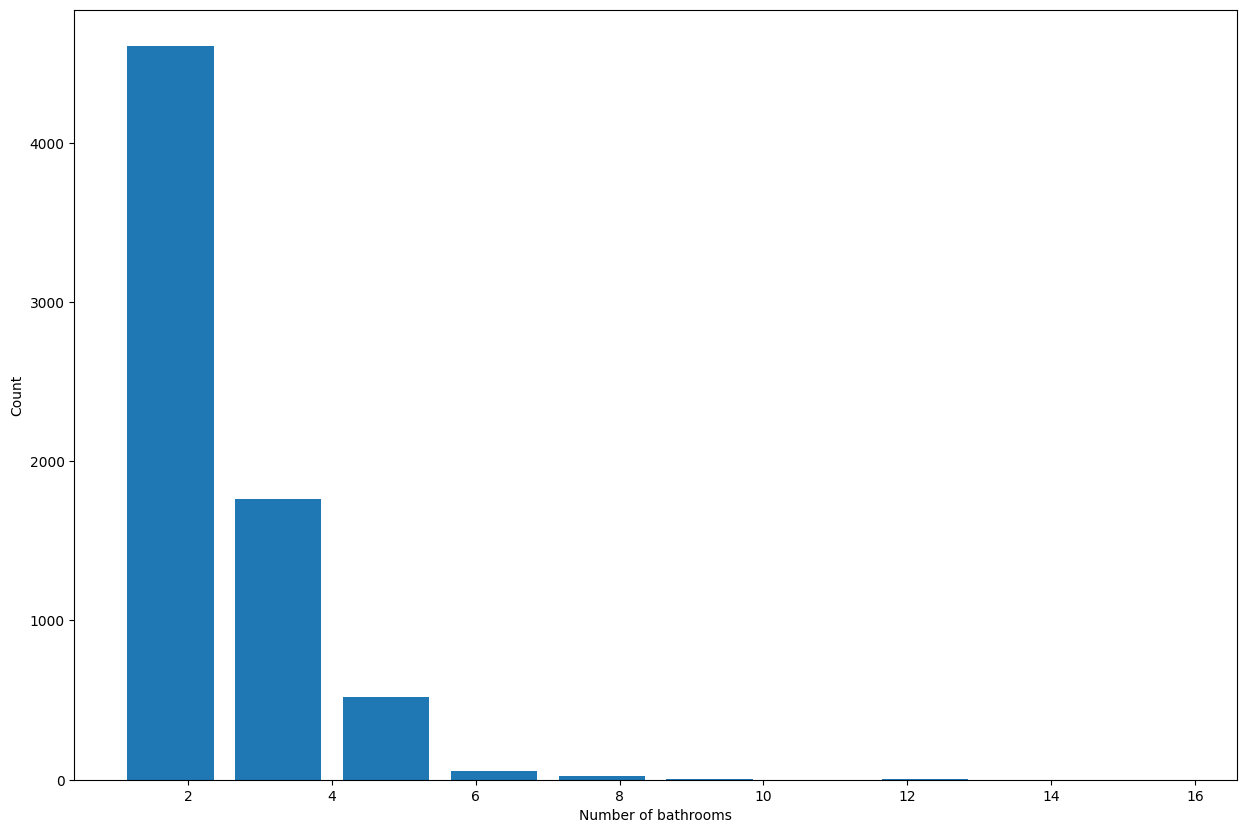

In [109]:
plt.hist(df2.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [111]:
df2[df2.bath>df2.bedrooms+2]

,location,size,total_sqft,bath,price,BHK,bedrooms,price_per_sqft
1127,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,4,3252.03252
4405,Thanisandra,3 BHK,1806.0,6.0,116.0,3,3,6423.03433
